Use shift-enter to execute a code block and move to the next one.

In [0]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

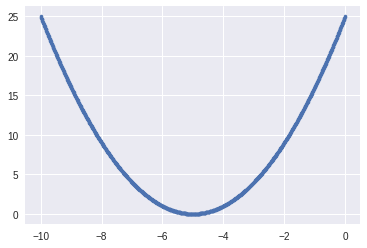

In [136]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
#x_data = np.random.rand(50).astype(np.float32)
#noise = np.random.normal(scale=0.01, size=len(x_data))
#y_data = x_data * 2-5 + noise
x_data = np.linspace(-10,0,1000)
y_data = (x_data+5)**2
# Uncomment the following line to plot our input data.
pylab.plot(x_data, y_data, '.')


In [137]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
x = tf.Variable(tf.random_uniform([1], -10, 0))
#b = tf.Variable(tf.zeros([1]))
y =  (x+5)**2

# Uncomment the following lines to see W and b are.
print(x_data)
print(y_data)

[-10.          -9.98998999  -9.97997998  -9.96996997  -9.95995996
  -9.94994995  -9.93993994  -9.92992993  -9.91991992  -9.90990991
  -9.8998999   -9.88988989  -9.87987988  -9.86986987  -9.85985986
  -9.84984985  -9.83983984  -9.82982983  -9.81981982  -9.80980981
  -9.7997998   -9.78978979  -9.77977978  -9.76976977  -9.75975976
  -9.74974975  -9.73973974  -9.72972973  -9.71971972  -9.70970971
  -9.6996997   -9.68968969  -9.67967968  -9.66966967  -9.65965966
  -9.64964965  -9.63963964  -9.62962963  -9.61961962  -9.60960961
  -9.5995996   -9.58958959  -9.57957958  -9.56956957  -9.55955956
  -9.54954955  -9.53953954  -9.52952953  -9.51951952  -9.50950951
  -9.4994995   -9.48948949  -9.47947948  -9.46946947  -9.45945946
  -9.44944945  -9.43943944  -9.42942943  -9.41941942  -9.40940941
  -9.3993994   -9.38938939  -9.37937938  -9.36936937  -9.35935936
  -9.34934935  -9.33933934  -9.32932933  -9.31931932  -9.30930931
  -9.2992993   -9.28928929  -9.27927928  -9.26926927  -9.25925926
  -9.24924

In [138]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(x+5))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

('loss:', <tf.Tensor 'Mean_14:0' shape=() dtype=float32>)
('optimizer:', <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fbfc5366510>)
('train:', <tf.Operation 'GradientDescent_14' type=NoOp>)
name: "init_14"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"
input: "^Variable_4/Assign"
input: "^Variable_5/Assign"
input: "^Variable_6/Assign"
input: "^Variable_7/Assign"
input: "^Variable_8/Assign"
input: "^Variable_9/Assign"
input: "^Variable_10/Assign"
input: "^Variable_11/Assign"
input: "^Variable_12/Assign"
input: "^Variable_13/Assign"
input: "^Variable_14/Assign"
input: "^Variable_15/Assign"
input: "^Variable_16/Assign"
input: "^Variable_17/Assign"
input: "^Variable_18/Assign"
input: "^Variable_19/Assign"
input: "^Variable_20/Assign"
input: "^Variable_21/Assign"
input: "^Variable_22/Assign"
input: "^Variable_23/Assign"
input: "^Variable_24/Assign"
input: "^Variable_25/Assign"
inp

In [139]:
# 1.5 Uncomment the following line to see what we have built.
print(tf.get_default_graph().as_graph_def())

node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "random_uniform/RandomUniform"
  op: "RandomUniform"
  input: "random_uniform/shape"
  attr {
    key: "T"
    value {
    

In [140]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([x]))

[array([-8.108311], dtype=float32)]


In [141]:
# 1.7 Perform training.
for step in range(201):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
  #  if step % 20 == 0:
   #     print(step, sess.run([x_data, y_data]))

print(sess.run([x]))

[array([-5.], dtype=float32)]


In [0]:
#1.8 Uncomment the following lines to compare.
#pylab.plot(x_data, y_data, '.', label="target_values")
#pylab.plot(x_data, y_initial_values, ".", label="initial_values")
#pylab.plot(x_data, sess.run(y), ".", label="trained_values")
#pylab.legend()
#pylab.ylim(0,1.0 )

<p>Back to [0_tf_hello_world.ipynb](0_tf_hello_world.ipynb).</p>
<p>Next to [2_mnist.ipynb](2_mnist.ipynb).</p>